In [88]:
import seaborn as sns
import pandas as pd
import numpy as np
def anti_trafo(x, adult_age=20):
    y = np.where(
        x < 0, (1 + adult_age) * np.exp(x) - 1, (1 + adult_age) * x + adult_age
    )
    return y

In [96]:
url='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE186nnn/GSE186888/matrix/GSE186888_series_matrix.txt.gz'
url='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE186nnn/GSE186458/matrix/GSE186458_series_matrix.txt.gz'
age=pd.read_table(url,skiprows=80,index_col=0).iloc[10].str.strip('age: ')

In [48]:
%%time
df=pd.read_table('data/merge/wbc.table',nrows=10**8,index_col=0)

CPU times: user 1min 6s, sys: 5.25 s, total: 1min 11s
Wall time: 1min 11s


In [103]:
df.columns=df.columns.str[:10]

In [38]:
df.iloc[:,2].mean()

0.7929392584634033

<Axes: >

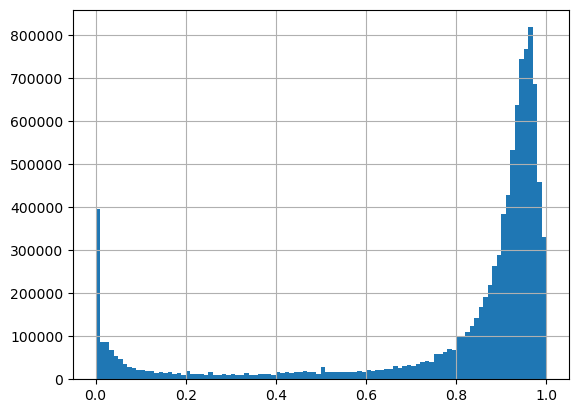

In [39]:
df.iloc[:,2].hist(bins=100)

In [42]:
man=pd.read_table('../biomodal/data/ref/HM450.hg38.manifest.tsv',usecols=['Probe_ID','CpG_chrm','CpG_beg'],index_col='Probe_ID')
man=man.dropna().copy()
man.columns=['chr','beg']
man['pos']=man['chr']+':'+(man['beg']+1).astype(int).astype(str)

In [69]:
%%time
han=pd.read_csv('https://raw.githubusercontent.com/bio-learn/biolearn/master/biolearn/data/Horvath1.csv',index_col=0)
han=han.join(man,how='inner')
han['beg']=han['beg'].astype(int)
han.index=han['chr']+':'+(han['beg']).astype(str)
han.shape

CPU times: user 115 ms, sys: 12.1 ms, total: 127 ms
Wall time: 266 ms


(353, 4)

In [55]:
df.index=df.index.rename('cpg')
df.index=df.index.str[:-6]

In [70]:
%%time
dg=han.join(df)

CPU times: user 3.69 ms, sys: 981 µs, total: 4.67 ms
Wall time: 4.38 ms


In [83]:
for i in df.columns:
    dg[i]=dg[i]*dg['CoefficientTraining']

In [92]:
dg[df.columns].sum().apply(lambda x: anti_trafo(x + 0.696)).sort_values()

Unnamed: 23                               16.220699
GSM6810034_CNVS-NORM-110033253-WBC.bed    26.478275
GSM6810048_CNVS-NORM-110036152-WBC.bed    30.114307
GSM6810040_CNVS-NORM-110033746-WBC.bed    36.132690
GSM6810027_CNVS-NORM-110000264-WBC.bed    36.348086
GSM6810047_CNVS-NORM-110036138-WBC.bed    36.548990
GSM6810039_CNVS-NORM-110033745-WBC.bed    37.255289
GSM6810036_CNVS-NORM-110033577-WBC.bed    39.471042
GSM6810041_CNVS-NORM-110033750-WBC.bed    39.784939
GSM6810038_CNVS-NORM-110033727-WBC.bed    39.828774
GSM6810031_CNVS-NORM-110029979-WBC.bed    41.112057
GSM6810028_CNVS-NORM-110027051-WBC.bed    42.043952
GSM6810044_CNVS-NORM-110033933-WBC.bed    45.017791
GSM6810030_CNVS-NORM-110029639-WBC.bed    45.079297
GSM6810029_CNVS-NORM-110027054-WBC.bed    45.805058
GSM6810037_CNVS-NORM-110033633-WBC.bed    49.922848
GSM6810045_CNVS-NORM-110036059-WBC.bed    50.793273
GSM6810032_CNVS-NORM-110032739-WBC.bed    55.470797
GSM6810042_CNVS-NORM-110033907-WBC.bed    56.161561
GSM6810046_C

In [109]:
age=age[age.index.isin(df.columns)]
age=age.rename('age')
age=age.astype(int)

In [121]:
df.columns=['x']+list(df.columns)[:-1]

In [ ]:
df=df.drop('x',1).copy()

In [ ]:
dfn=df.dropna()

In [192]:
dt=dfn.head(10**8).T

In [193]:
dt=dt.join(age)

In [195]:
dt.shape

(22, 25782403)

<Axes: xlabel='age', ylabel='chr6:11044643'>

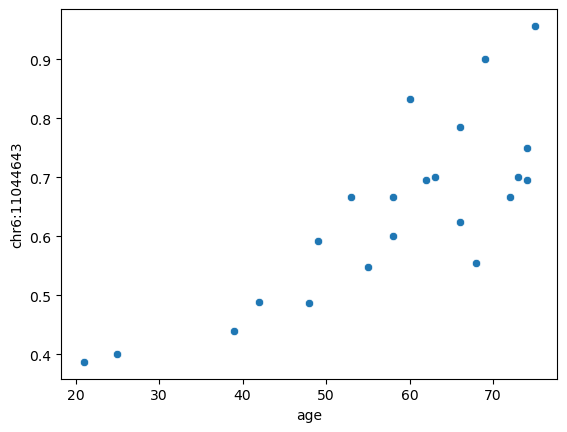

In [241]:
c='chr6:11044643'
sns.scatterplot(dt,x='age',y=c)

In [236]:
m=dfn.median()

In [233]:
std=df.std()

In [237]:
pl=pd.concat([age,m],1)

/local/scratch/moqri/slrmtmp.42058441/ipykernel_29322/1025423528.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pl=pd.concat([age,m],1)


In [249]:
dt['age']=pd.cut(dt['age'],[0,45,70,100],labels=['y','m','o'])

In [253]:
dm=dt.groupby('age').mean()

In [256]:
dmt=dm.T

In [270]:
dmt['chr']=dmt.index.str.split(':').str[0]

In [271]:
dmt['beg']=dmt.index.str.split(':').str[1].astype(int)

In [272]:
dmt['d']=dmt['o']-dmt['y']

In [274]:
dmt[(dmt['chr']=='chr6')&(dmt['beg']>11044643-100)].head(50)

age,y,m,o,chr,beg,d
chr6:11044627,0.370627,0.525970,0.574350,chr6,11044627,0.203722
chr6:11044630,0.221690,0.354790,0.446802,chr6,11044630,0.225112
chr6:11044633,0.733006,0.850398,0.937735,chr6,11044633,0.204729
chr6:11044639,0.506368,0.697422,0.830090,chr6,11044639,0.323722
chr6:11044641,0.239236,0.398255,0.451612,chr6,11044641,0.212377
chr6:11044643,0.428867,0.665850,0.753768,chr6,11044643,0.324901
chr6:11044646,0.688301,0.786832,0.879344,chr6,11044646,0.191044
chr6:11044654,0.272766,0.453829,0.468831,chr6,11044654,0.196065
chr6:11044660,0.293431,0.494572,0.569128,chr6,11044660,0.275697
chr6:11044682,0.069648,0.072484,0.064897,chr6,11044682,-0.004751


In [ ]:
dmt[dmt